In [1]:
# подгружаем все нужные пакеты
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (12, 9), 
        "axes.titlesize" : 18 
    }
)

In [2]:
train = pd.read_csv('bootcamp.csv', sep=';',
                    index_col='id')

In [3]:
print('Размер датасета: ', train.shape)
train.head()

Размер датасета:  (70000, 12)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Переведем данные в "Long Format"-представление и отрисуем с помощью factorplot количество значений, которые принимают категориальные переменные.

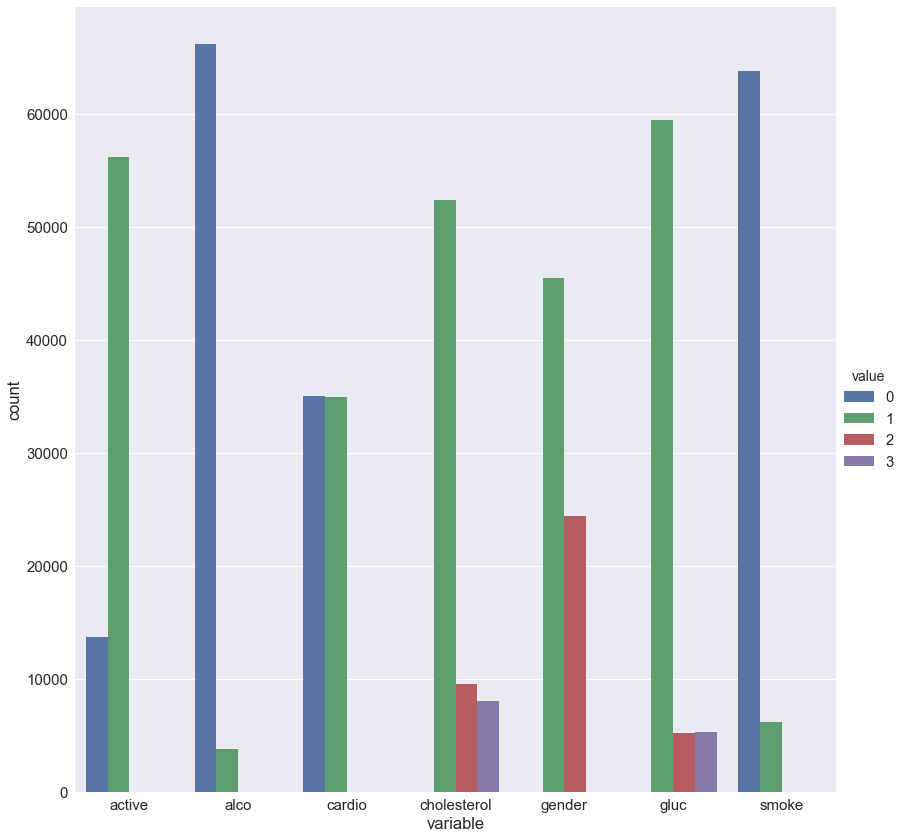

In [4]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active', 'cardio'])
train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 
                                                    'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               data=train_uniques, kind='bar', size=12);

Видим, что классы целевой переменно сбалансированы, отлично!

Можно также разбить элементы обучающей выборки по значениям целевой переменной: иногда на таких графиках можно сразу увидеть самый значимый признак.

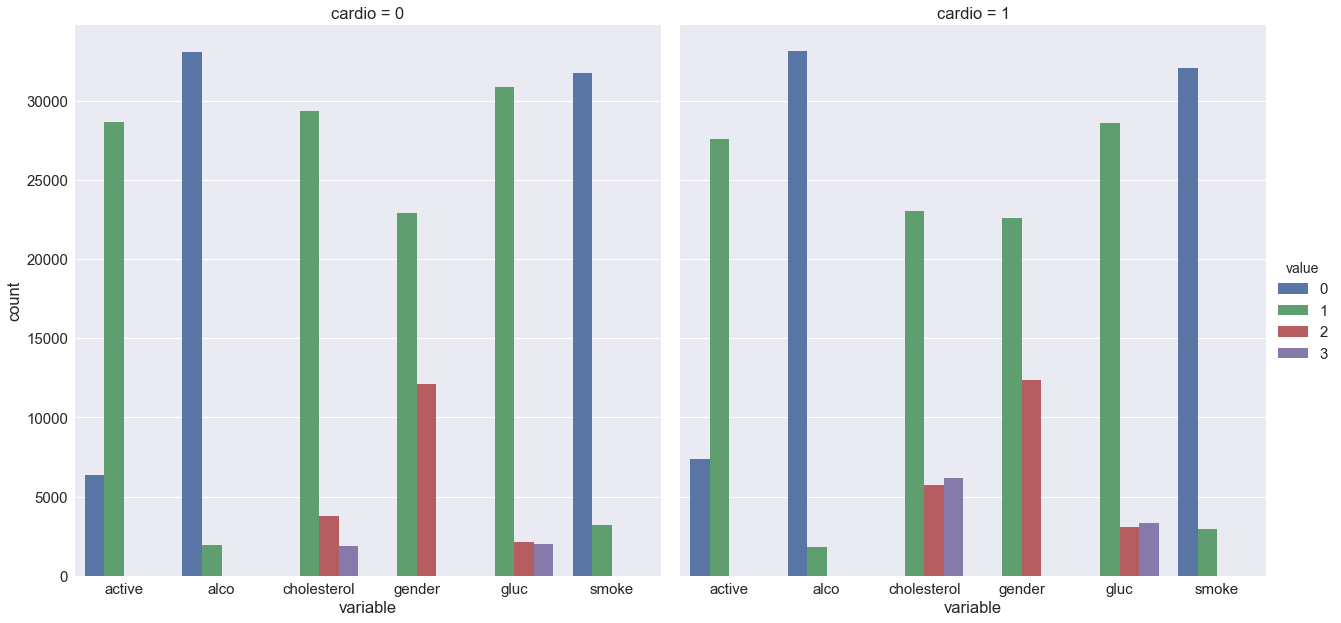

In [5]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active'], 
                        id_vars=['cardio'])
train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 'value', 
                                                    'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=train_uniques, kind='bar', size=9);

Видим, что в зависимости от целевой переменной сильно меняется распределение холестерина и глюкозы. Совпадение?

#### Немного статистики по уникальным значениям признаков.

In [7]:
for c in train.columns:
    n = train[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(train[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


## 1. Визуализируем корреляционную матрицу

Для того, чтобы лучше понять признаки в датасете, можно посчитать матрицу коэффициентов корреляции между признаками. 

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

Какие два признака больше всего коррелируют (по Пирсону) с признаком gender ?

- Cardio, Cholesterol
- Height, Smoke
- Smoke, Alco
- Height, Weight


In [8]:
# sns.heatmap()
train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


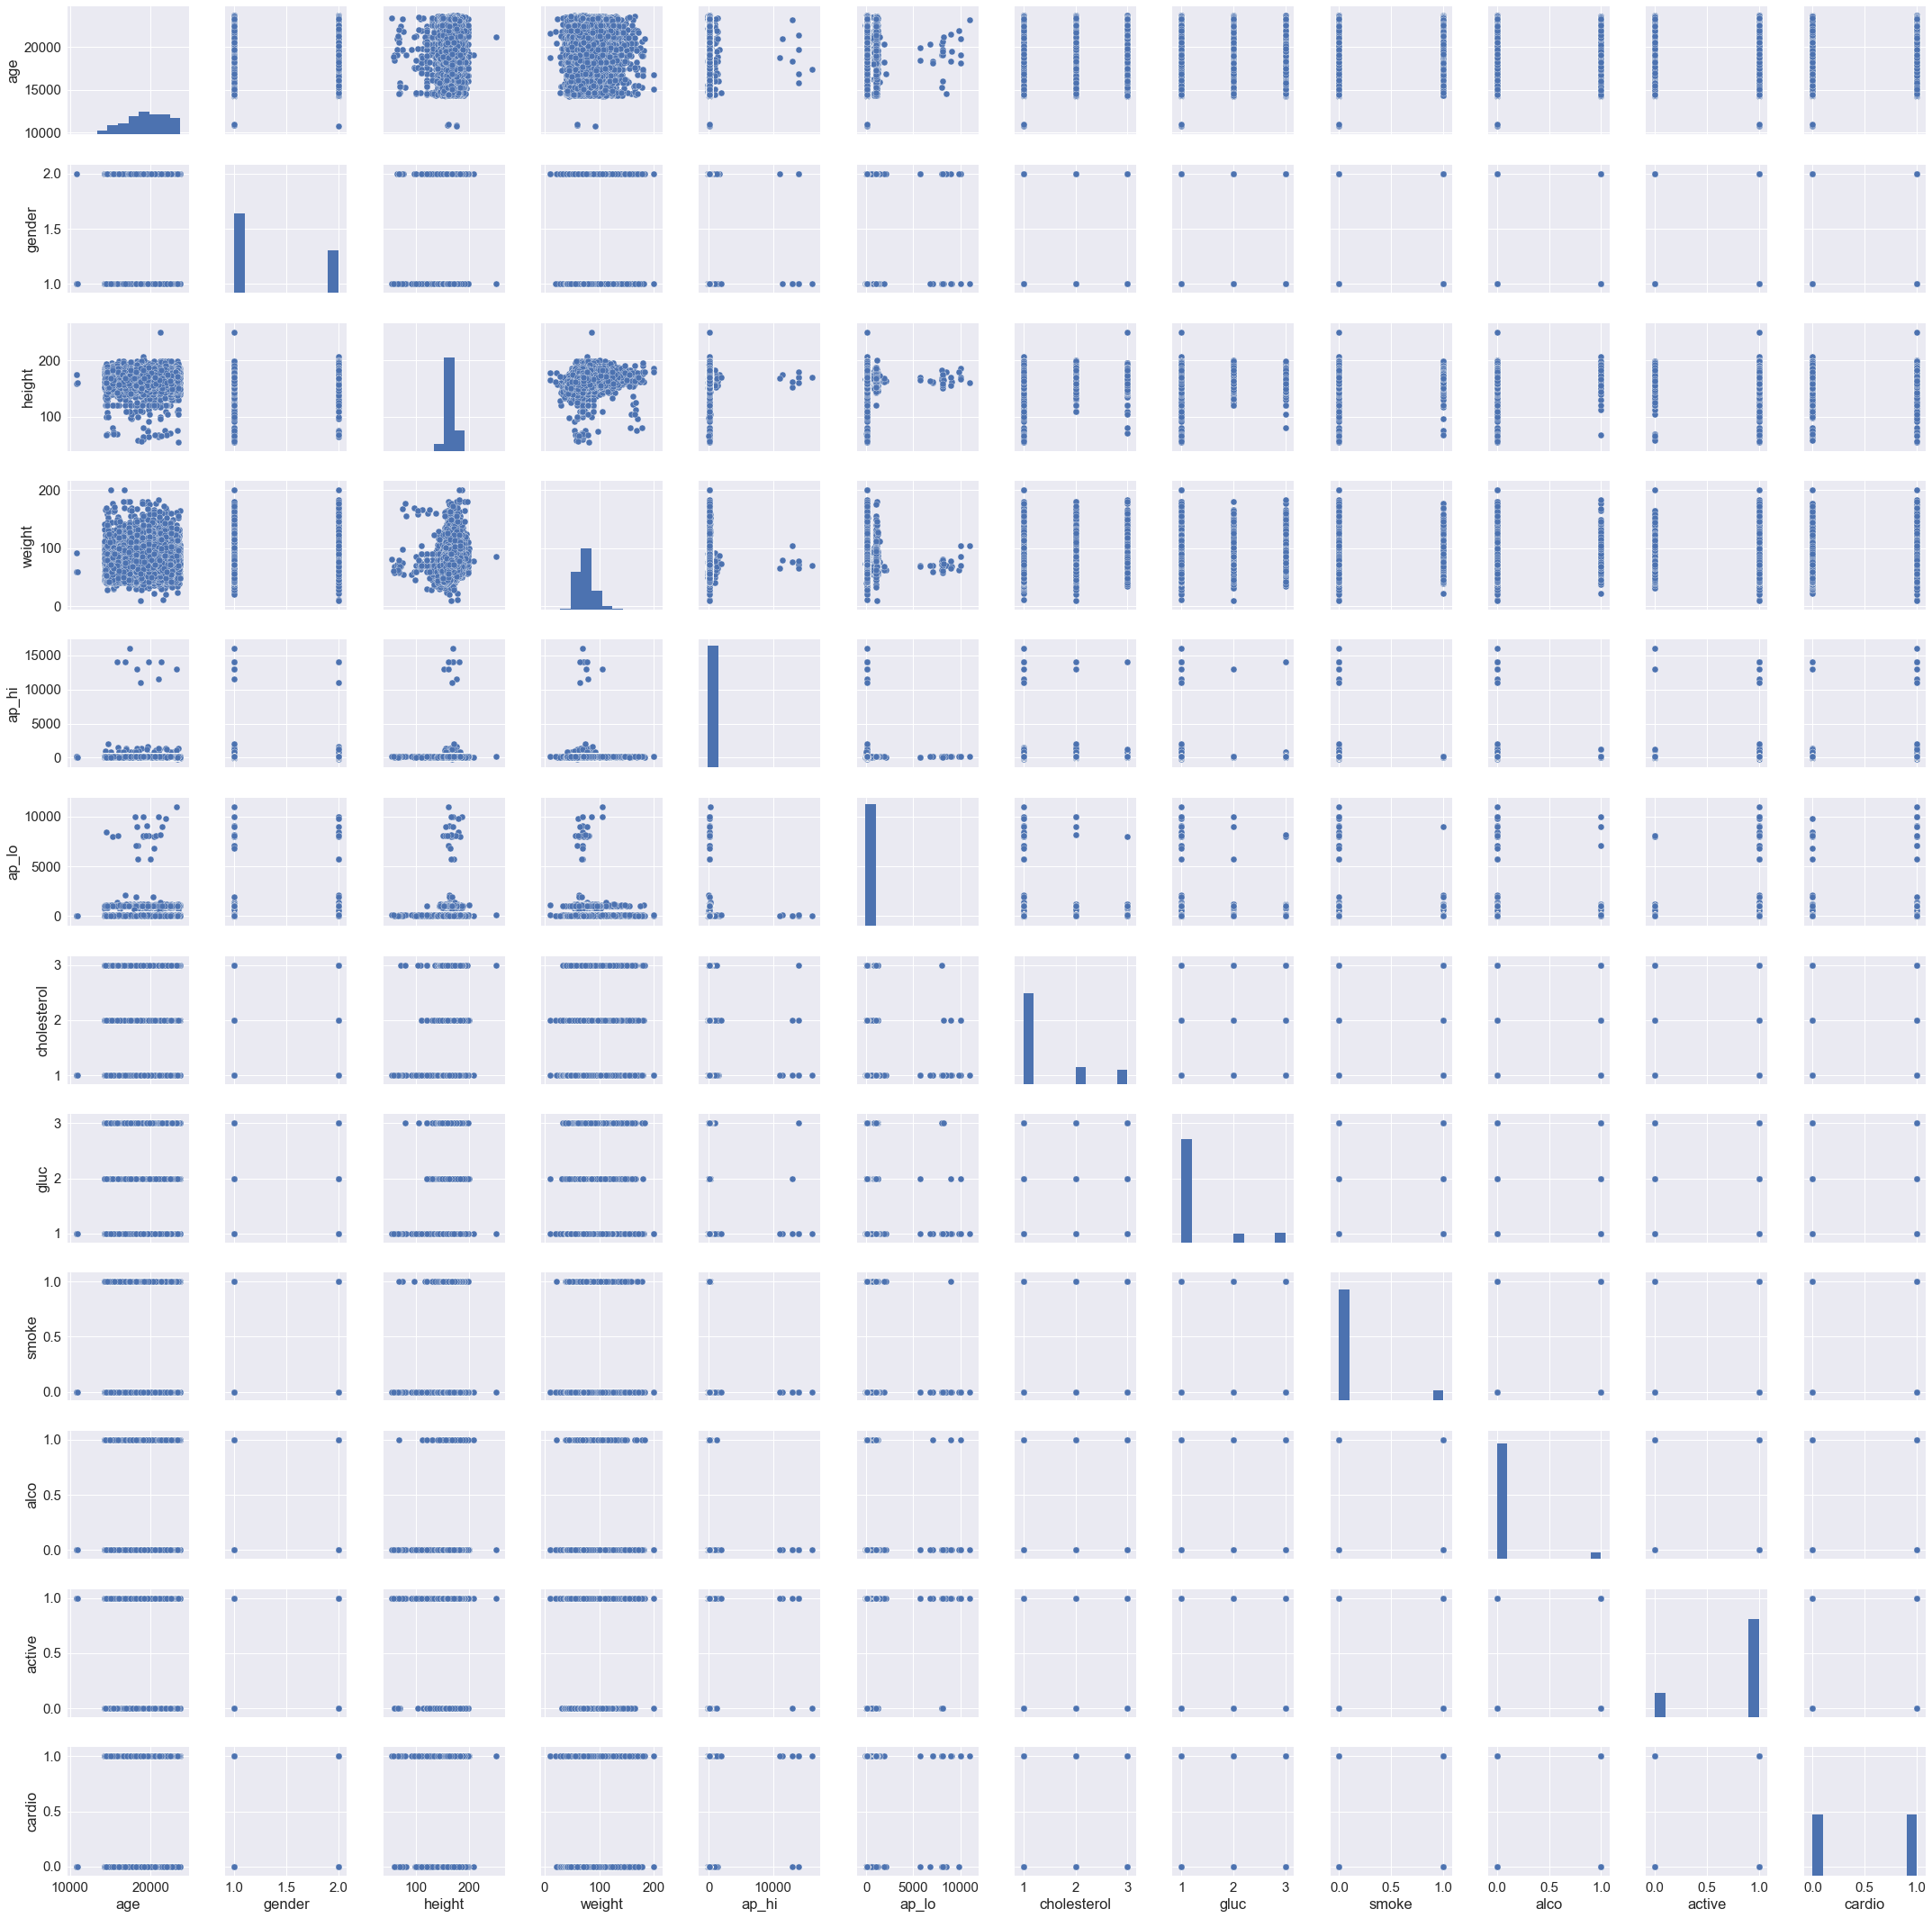

In [11]:
cols = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke','alco','active','cardio']
sns_plot = sns.pairplot(train[cols])
sns_plot.savefig('pairplot.png')

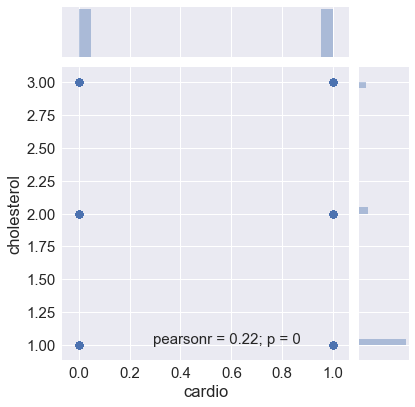

In [13]:
sns.jointplot(train.cardio, train.cholesterol)

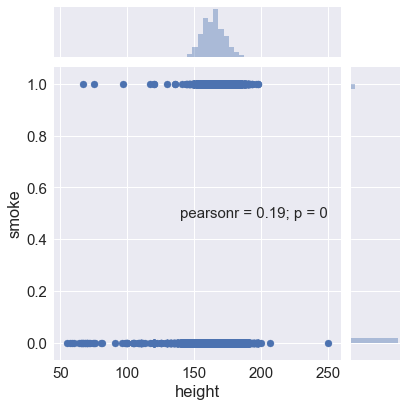

In [14]:
sns.jointplot(train.height, train.smoke)

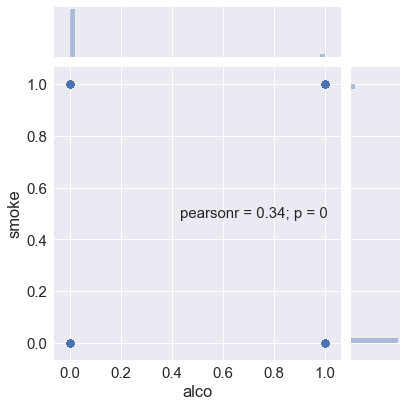

In [15]:
sns.jointplot(train.alco, train.smoke)

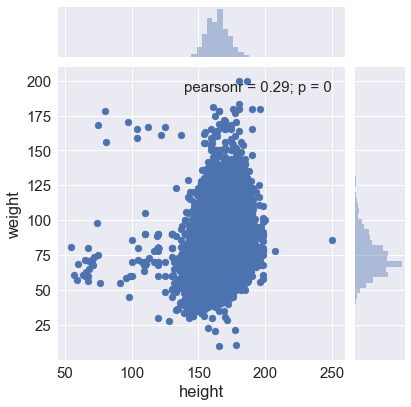

In [16]:
sns.jointplot(train.height, train.weight)

In [19]:
sns.violinplot(hue='gender', scale={train.height, train.weight})

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [31]:
sns.violinplot(x='variable', y='value', hue = 'gender', data=train)

ValueError: Could not interpret input 'variable'

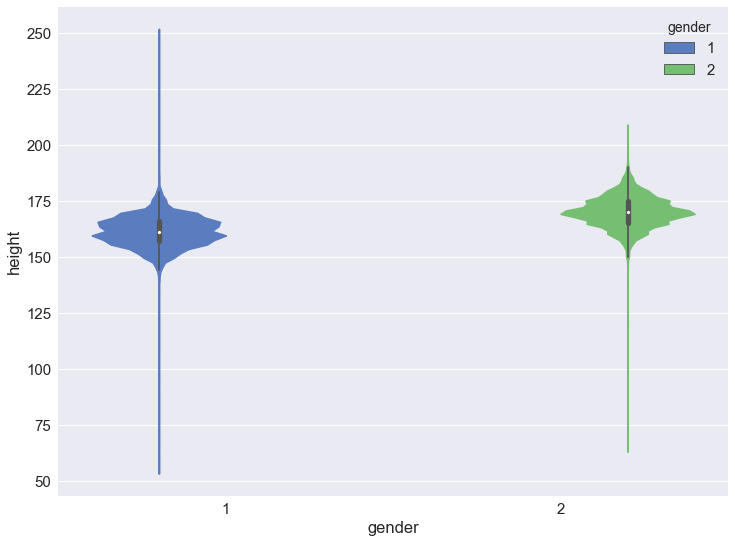

In [29]:
sns.violinplot(x="gender", y="height", hue="gender", data=train, palette="muted")

In [ ]:
# corr_matrix = train.drop(['height', 'weight'], axis=1).corr()
# sns.heatmap(corr_matrix);

In [ ]:
# corr_matrix = train.drop(['age', 'weight'], axis=1).corr()
# sns.heatmap(corr_matrix);

### Какие признаки теперь больше всего коррелируют (по Спирмену) друг с другом?


corr                   age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.022811 -0.081515  0.053684  0.020764  0.017647   
gender      -0.022811  1.000000  0.499033  0.155406  0.006005  0.015254   
height      -0.081515  0.499033  1.000000  0.290968  0.005488  0.006150   
weight       0.053684  0.155406  0.290968  1.000000  0.030702  0.043710   
ap_hi        0.020764  0.006005  0.005488  0.030702  1.000000  0.016086   
ap_lo        0.017647  0.015254  0.006150  0.043710  0.016086  1.000000   
cholesterol  0.154424 -0.035821 -0.050226  0.141768  0.023778  0.024019   
gluc         0.098703 -0.020491 -0.018595  0.106857  0.011841  0.010806   
smoke       -0.047633  0.338135  0.187989  0.067780 -0.000922  0.005186   
alco        -0.029723  0.170966  0.094419  0.067113  0.001408  0.010601   
active      -0.009927  0.005866 -0.006570 -0.016867 -0.000033  0.004780   
cardio       0.238159  0.008109 -0.010821  0.181660  0.054475  0.065719   

             choles

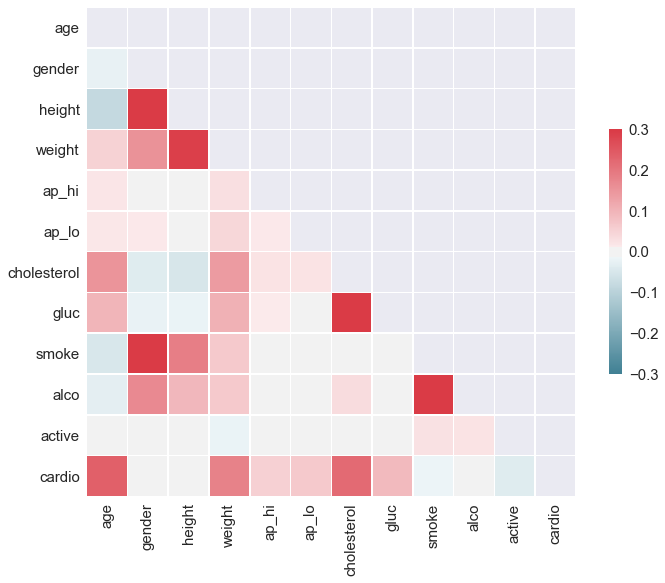

In [10]:
corr = train.corr()
print('corr', corr)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Сколько четко-выраженных кластеров получилось на совместном графике выбранных признаков, с логарифмической шкалой?

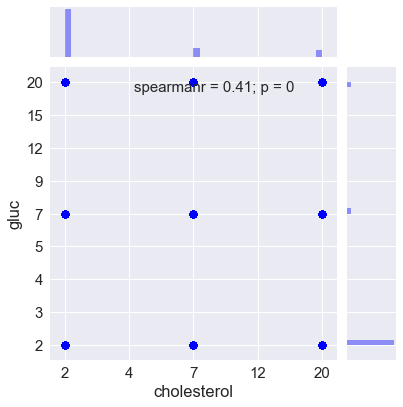

In [24]:
from scipy.stats import spearmanr
g = sns.jointplot('cholesterol', 'gluc', data=train, stat_func=spearmanr, color="b")

"""Сетка"""
g.ax_joint.grid(True) 

"""Преобразуем логарифмические значения на шкалах в реальные"""
g.ax_joint.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))
g.ax_joint.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))

### В каком возрасте количество пациентов с ССЗ впервые становится больше, чем здоровых?

In [26]:
train['age_years'] = (train['age'] // 365.25).astype(int)
train['age_years'].head()

id
0    50
1    55
2    51
3    48
4    47
Name: age_years, dtype: int32

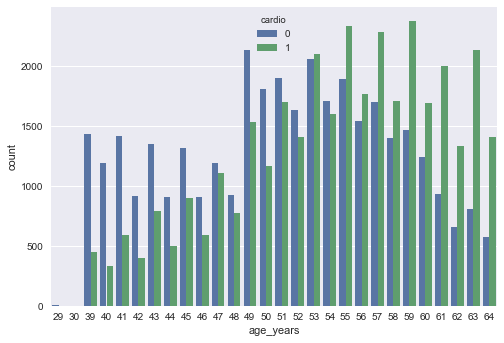

In [33]:
sns.set(style="darkgrid")
sns.countplot(x="age_years", hue="cardio", data=train)